In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-01-23 17:38:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   292MB/s    in 0.4s    

2022-01-23 17:38:31 (292 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_name = class_names[1:]
print(class_names)

['pizza' 'steak']


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

#function to visualize images

def view_random_image(target_dir,target_class):
  target_folder =target_dir +target_class
  random_img = random.sample(os.listdir(target_folder),1)
  print(random_img)
  img = mpimg.imread(target_folder+"/"+random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

['640539.jpg']
Image shape: (384, 512, 3)


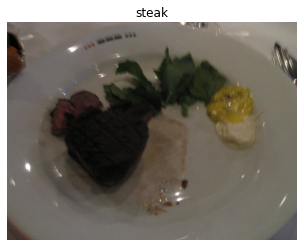

In [5]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [6]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[109, 104, 100],
        [109, 104, 100],
        [110, 105, 101],
        ...,
        [139, 134, 128],
        [138, 133, 127],
        [137, 132, 126]],

       [[108, 100,  97],
        [108, 100,  97],
        [110, 102,  99],
        ...,
        [139, 134, 128],
        [138, 133, 127],
        [137, 132, 126]],

       [[ 99,  91,  88],
        [101,  93,  90],
        [104,  96,  93],
        ...,
        [140, 135, 129],
        [139, 134, 128],
        [138, 133, 127]],

       ...,

       [[ 66,  56,  47],
        [ 66,  56,  47],
        [ 67,  57,  48],
        ...,
        [ 90,  89,  95],
        [ 89,  88,  94],
        [ 89,  88,  94]],

       [[ 66,  56,  46],
        [ 66,  56,  46],
        [ 66,  56,  46],
        ...,
        [ 89,  88,  94],
        [ 88,  87,  93],
        [ 88,  87,  93]],

       [[ 66,  56,  46],
        [ 66,  56,  46],
        [ 66,  56,  46],
        ...,
        [ 88,  87,  9

In [7]:
img/255.

array([[[0.42745098, 0.40784314, 0.39215686],
        [0.42745098, 0.40784314, 0.39215686],
        [0.43137255, 0.41176471, 0.39607843],
        ...,
        [0.54509804, 0.5254902 , 0.50196078],
        [0.54117647, 0.52156863, 0.49803922],
        [0.5372549 , 0.51764706, 0.49411765]],

       [[0.42352941, 0.39215686, 0.38039216],
        [0.42352941, 0.39215686, 0.38039216],
        [0.43137255, 0.4       , 0.38823529],
        ...,
        [0.54509804, 0.5254902 , 0.50196078],
        [0.54117647, 0.52156863, 0.49803922],
        [0.5372549 , 0.51764706, 0.49411765]],

       [[0.38823529, 0.35686275, 0.34509804],
        [0.39607843, 0.36470588, 0.35294118],
        [0.40784314, 0.37647059, 0.36470588],
        ...,
        [0.54901961, 0.52941176, 0.50588235],
        [0.54509804, 0.5254902 , 0.50196078],
        [0.54117647, 0.52156863, 0.49803922]],

       ...,

       [[0.25882353, 0.21960784, 0.18431373],
        [0.25882353, 0.21960784, 0.18431373],
        [0.2627451 , 0

In [8]:
#normalization of input image data (0,1)// 255 is the max pixel value
#CNN model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#ImageDataGenerator produces realtime image transformations(eg normalization)
#produces data and labels both
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#setup paths to directories 
train_dir = "/content/pizza_steak/train"
test_dir =  "/content/pizza_steak/test"

#import from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              seed = 42)

#build a CNN model (tiny VGG models)

model1 = tf.keras.Sequential([tf.keras.layers.Conv2D(filters = 10,
                                                            kernel_size = 2,
                                                            activation = 'relu',
                                                            input_shape = (224,224,3)),
                              tf.keras.layers.Conv2D(10,3,activation='relu'),
                              tf.keras.layers.MaxPool2D(pool_size = 2,
                                                        padding = "valid"),
                              tf.keras.layers.Conv2D(10,3,activation='relu'),
                              tf.keras.layers.Conv2D(10,3,activation='relu'),
                              tf.keras.layers.MaxPool2D(pool_size = 2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1,activation='sigmoid')
])

model1.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

history1 = model1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 200ms/step - loss: 0.5690 - accuracy: 0.7000 - val_loss: 0.4232 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4234 - accuracy: 0.8180 - val_loss: 0.3446 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3941 - accuracy: 0.8360 - val_loss: 0.3271 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3605 - accuracy: 0.8427 - val_loss: 0.3297 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3419 - accuracy: 0.8533 - val_loss: 0.3322 - val_accuracy: 0.8580


In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 10)      130       
                                                                 
 conv2d_1 (Conv2D)           (None, 221, 221, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

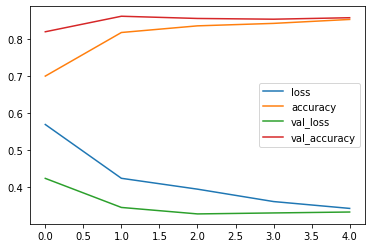

In [10]:
import pandas as pd

pd.DataFrame(history1.history).plot()

BREAK THE CODE

['1870942.jpg']
Image shape: (512, 512, 3)
['3314176.jpg']
Image shape: (512, 512, 3)


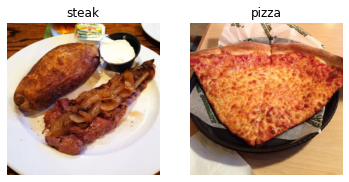

In [11]:
#visualize data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")
plt.subplot(1,2,2)
steak_img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [12]:
#preprocessing the data
#splitting into training and test/valid

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [13]:
#importing images in batches using generators

from tensorflow.keras.preprocessing.image import  ImageDataGenerator
#ImageDataGenerator is used for realtime data augmentation

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


In [14]:
#load the images from directories and turn them into batches of 32
#flow from directory is used to load images and automatically infers classes to input data
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224),
                                              class_mode = 'binary',
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
#get sample training data batch

images,labels = train_data.next()
len(images),len(labels)


(32, 32)

In [16]:
#no. of batches
len(train_data)

47

In [17]:
#images
images[1].shape

(224, 224, 3)

In [18]:
#creating a baseline model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential

model2 = Sequential()
model2.add(Conv2D(filters= 10,
                  kernel_size=3,
                  activation='relu',
                  strides = 1,
                  padding='valid',
                  input_shape=(224,224,3)))
model2.add(Conv2D(10,3,activation='relu'))
model2.add(Conv2D(10,3,activation='relu'))
model2.add(Flatten())
model2.add(Dense(1,activation='sigmoid'))

In [19]:
#compile our model

model2.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics = ["accuracy"])

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [21]:
#fit the model

hisroy2  = model2.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 206ms/step - loss: 0.8537 - accuracy: 0.6987 - val_loss: 0.4153 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4147 - accuracy: 0.8253 - val_loss: 0.4401 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3147 - accuracy: 0.8707 - val_loss: 0.3492 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.1823 - accuracy: 0.9393 - val_loss: 0.3458 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.0931 - accuracy: 0.9687 - val_loss: 0.4340 - val_accuracy: 0.8140


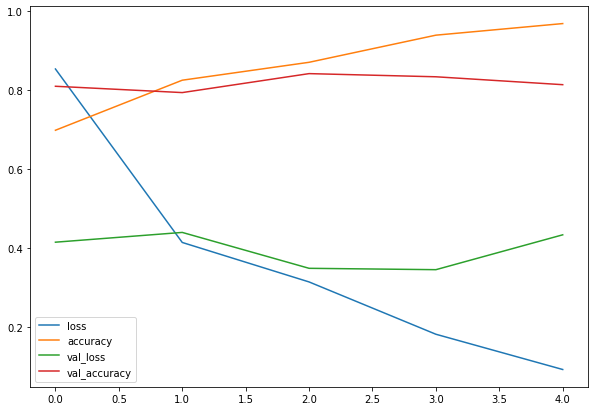

In [22]:
#evaluating the model
import pandas as pd
pd.DataFrame(hisroy2.history).plot(figsize=(10,7))

In [23]:
def plot_loss(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss,label="training loss")
  plt.plot(epochs,val_loss,label="validation loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label="accuracy")
  plt.plot(epochs,val_accuracy,label="validation accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

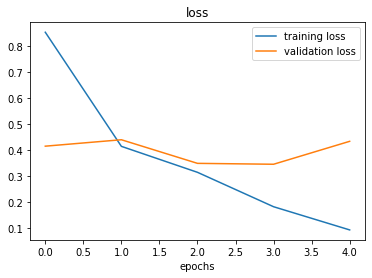

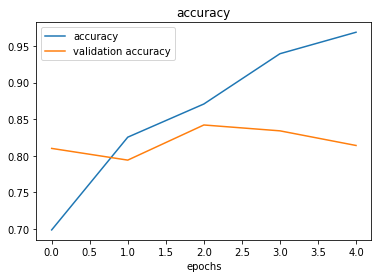

In [24]:
plot_loss(hisroy2)

In [25]:
#adjusting parameters to make a better model
#reduciing overfitting
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential


model3 = Sequential()
model3.add(Conv2D(10,3,activation='relu',input_shape=(224,224,3)))
model3.add(MaxPool2D(pool_size=2))
model3.add(Conv2D(10,3,activation='relu'))
model3.add(MaxPool2D())
model3.add(Conv2D(10,3,activation='relu'))
model3.add(MaxPool2D())
model3.add(Flatten())
model3.add(Dense(1,activation='sigmoid'))

In [26]:
model3.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics = ["accuracy"])

In [27]:
hisroy3  = model3.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6265 - accuracy: 0.6480 - val_loss: 0.5591 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.5043 - accuracy: 0.7547 - val_loss: 0.4595 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4505 - accuracy: 0.8020 - val_loss: 0.3931 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4095 - accuracy: 0.8120 - val_loss: 0.3602 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.3928 - accuracy: 0.8187 - val_loss: 0.3523 - val_accuracy: 0.8340


In [28]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

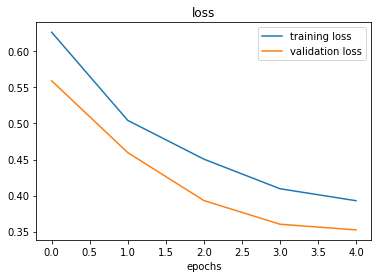

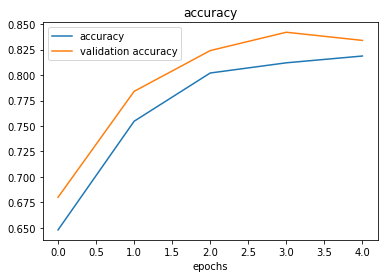

In [29]:
plot_loss(hisroy3)

In [30]:
#using augmentations in out train data using ImageDataGenerator to create more diversity in input for learning

train_datagen_aug = ImageDataGenerator(rescale = 1/255.,
                                       rotation_range = 0.2,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       width_shift_range=0.2,
                                       height_shift_range =0.2,
                                       horizontal_flip =True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [31]:
#visualize augmented train images

print("Augmented Train data")

train_data_augmented = train_datagen_aug.flow_from_directory(train_dir,
                                         class_mode = 'binary',
                                         batch_size=32,
                                         shuffle = True,
                                         target_size=(224,224))

train_data = train_datagen.flow_from_directory(train_dir,
                           shuffle=True,
                           batch_size=32,
                           target_size=(224,224),
                           class_mode='binary')
IMAGE_SIZE = (224,224)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SIZE,
                                             batch_size=32,
                                             class_mode='binary')

Augmented Train data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [32]:
images,labels = train_data.next()
aug_images,aug_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

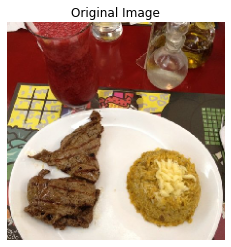

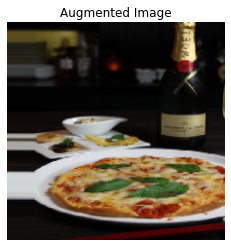

In [33]:
import random

random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [51]:
model4 = Sequential([
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(2),
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(2),
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(2),
                     Flatten(),
                     Dense(1,activation='sigmoid')

])

model4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

history4 = model4.fit(train_data_augmented,
                     epochs = 5,
                     steps_per_epoch = len(train_data_augmented),
                     validation_data = test_data,
                     validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 454ms/step - loss: 0.6448 - accuracy: 0.6127 - val_loss: 0.6036 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 21s 449ms/step - loss: 0.5846 - accuracy: 0.7013 - val_loss: 0.5125 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 21s 453ms/step - loss: 0.5378 - accuracy: 0.7313 - val_loss: 0.4332 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 21s 450ms/step - loss: 0.5179 - accuracy: 0.7500 - val_loss: 0.4238 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 21s 449ms/step - loss: 0.5214 - accuracy: 0.7200 - val_loss: 0.4271 - val_accuracy: 0.8020


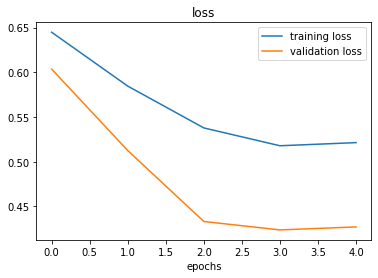

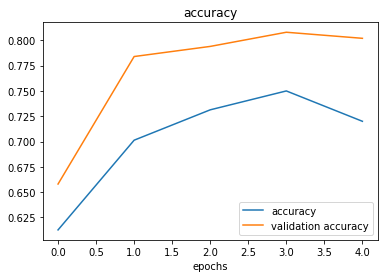

In [52]:
plot_loss(history4)

In [53]:
#make predications on our trained data
print(class_names)

['pizza' 'steak']


In [54]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2022-01-23 17:45:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-01-23 17:45:46 (48.6 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



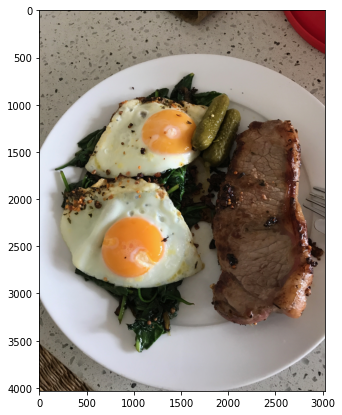

In [55]:
plt.figure(figsize=(10,7))
plt.imshow(steak)

In [56]:
steak.shape

(4032, 3024, 3)

In [57]:
#preprocess prediction data to the same format

def load_prep_img(filename,img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size=[img_shape,img_shape])
  img = img/255.
  return img

In [58]:
steak = load_prep_img("03-steak.jpeg")

In [59]:
pred = model4.predict(tf.expand_dims(steak,axis=0))

In [60]:
#creating a custom function to output class instead of probabilities
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [61]:
#take image and predict and plot
def pred_plot(model,filename,class_names= class_names):
  img = load_prep_img(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False)


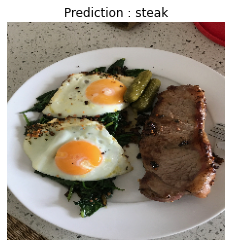

In [62]:
pred_plot(model4,"03-steak.jpeg")

In [63]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = "03-pizza-dad.jpeg"

--2022-01-23 17:45:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2022-01-23 17:45:58 (57.0 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



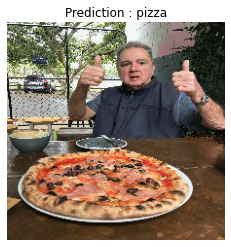

In [64]:
pred_plot(model4,"03-pizza-dad.jpeg")

In [67]:
#Multiclass CNN (10 classes)
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-01-23 17:51:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   301MB/s    in 1.6s    

2022-01-23 17:51:40 (301 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [76]:
#setup train and test

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [77]:
#class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3054411.jpg']
Image shape: (512, 512, 3)


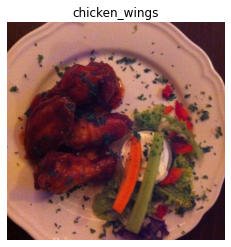

In [91]:
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [92]:
#preprocess the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



In [94]:
#load from directory into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode = 'categorical',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [98]:
#create a model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

model5 = Sequential([
                     Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(),
                     Conv2D(10,3,activation='relu'),
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(),
                     Flatten(),
                     Dense(10,activation='softmax')
])

model5.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

history5 = model5.fit(train_data,
                     epochs = 5,
                     steps_per_epoch=len(train_data),
                     validation_data = test_data,
                     validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 190ms/step - loss: 2.1925 - accuracy: 0.1932 - val_loss: 2.0715 - val_accuracy: 0.2516
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.9528 - accuracy: 0.3159 - val_loss: 1.9192 - val_accuracy: 0.3280
Epoch 3/5
235/235 [==============================] - 45s 190ms/step - loss: 1.7249 - accuracy: 0.4145 - val_loss: 1.9338 - val_accuracy: 0.3296
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 1.2870 - accuracy: 0.5715 - val_loss: 2.0375 - val_accuracy: 0.3360
Epoch 5/5
235/235 [==============================] - 44s 186ms/step - loss: 0.7165 - accuracy: 0.7671 - val_loss: 2.7690 - val_accuracy: 0.2768


In [99]:
#evaluate the model

model5.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 2.7690 - accuracy: 0.2768


[2.7689661979675293, 0.2768000066280365]

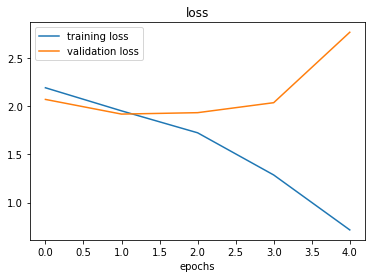

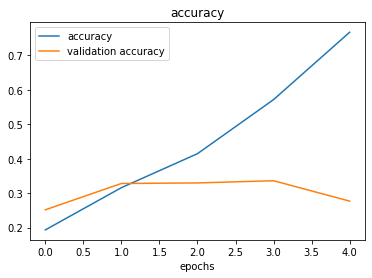

In [100]:
plot_loss(history5)

In [115]:
#using data augmentation
train_data_augmented = ImageDataGenerator(rescale = 1/255.,
                                       rotation_range = 0.2,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       width_shift_range=0.2,
                                       height_shift_range =0.2,
                                       horizontal_flip =True)
train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode = 'categorical',
                                               batch_size=32,
                                               )

Found 7500 images belonging to 10 classes.


In [108]:
#same model as model5 withj augmented data

history6 = model5.fit(train_data,
                      epochs= 5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 460ms/step - loss: 2.2381 - accuracy: 0.2235 - val_loss: 1.9555 - val_accuracy: 0.3136
Epoch 2/5
235/235 [==============================] - 109s 465ms/step - loss: 2.0470 - accuracy: 0.2825 - val_loss: 1.8692 - val_accuracy: 0.3512
Epoch 3/5
235/235 [==============================] - 108s 459ms/step - loss: 1.9929 - accuracy: 0.3012 - val_loss: 1.8650 - val_accuracy: 0.3444
Epoch 4/5
235/235 [==============================] - 108s 458ms/step - loss: 1.9436 - accuracy: 0.3249 - val_loss: 1.8554 - val_accuracy: 0.3584
Epoch 5/5
235/235 [==============================] - 108s 458ms/step - loss: 1.8963 - accuracy: 0.3415 - val_loss: 1.8060 - val_accuracy: 0.3868


In [109]:
model5.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.8060 - accuracy: 0.3868


[1.806030511856079, 0.38679999113082886]

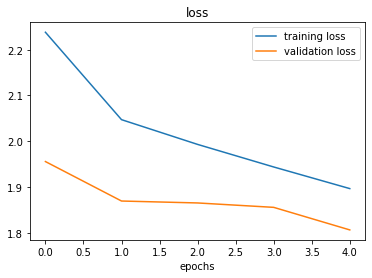

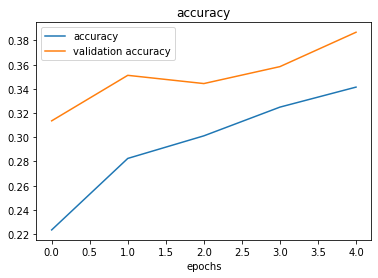

In [110]:
plot_loss(history6)

In [116]:
model7 = Sequential([
                     Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(),
                     Conv2D(10,3,activation='relu'),
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(),
                     Flatten(),
                     Dense(10,activation='softmax')
])

model7.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics =["accuracy"])

history7 = model7.fit(train_data_augmented,
                     epochs = 10,
                     steps_per_epoch = len(train_data),
                     validation_data = test_data,
                     validation_steps = len(test_data)
                     )

Epoch 1/10
235/235 [==============================] - 110s 464ms/step - loss: 2.2185 - accuracy: 0.1777 - val_loss: 2.0187 - val_accuracy: 0.2620
Epoch 2/10
235/235 [==============================] - 108s 460ms/step - loss: 2.0620 - accuracy: 0.2584 - val_loss: 1.9391 - val_accuracy: 0.2992
Epoch 3/10
235/235 [==============================] - 108s 460ms/step - loss: 2.0068 - accuracy: 0.2948 - val_loss: 1.8569 - val_accuracy: 0.3432
Epoch 4/10
235/235 [==============================] - 109s 462ms/step - loss: 1.9694 - accuracy: 0.3108 - val_loss: 1.8221 - val_accuracy: 0.3608
Epoch 5/10
235/235 [==============================] - 108s 461ms/step - loss: 1.9302 - accuracy: 0.3297 - val_loss: 1.8113 - val_accuracy: 0.3760
Epoch 6/10
235/235 [==============================] - 108s 461ms/step - loss: 1.9286 - accuracy: 0.3257 - val_loss: 1.8473 - val_accuracy: 0.3660
Epoch 7/10
235/235 [==============================] - 108s 461ms/step - loss: 1.8790 - accuracy: 0.3579 - val_loss: 1.8191 -

In [117]:
#making predictions

!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [118]:
#new pred_plot for multiclass and binary classification

def pred_plot(model,filename,class_names= class_names):
  img = load_prep_img(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  if len(pred[0])> 1:
    pred_class= class_names[int(tf.argmax(pred[0]))]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False)

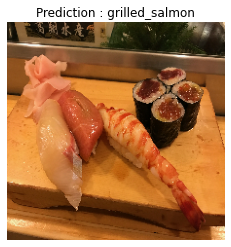

In [127]:
pred_plot(model7,"03-sushi.jpeg",class_names)

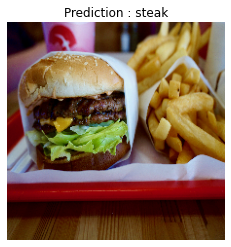

In [126]:
pred_plot(model7,"03-hamburger.jpeg", class_names)

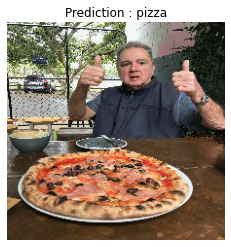

In [130]:
pred_plot(model7,"03-pizza-dad.jpeg", class_names)

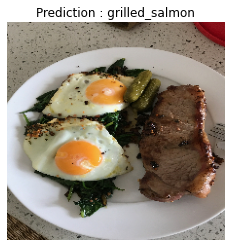

In [132]:
pred_plot(model7,"03-steak.jpeg", class_names)

In [133]:
#save load and predict

model7.save("saved_model7")

INFO:tensorflow:Assets written to: saved_model7/assets


In [136]:
loaded_model= tf.keras.models.load_model("saved_model7")

In [137]:
loaded_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_41 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_43 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [138]:
loaded_model.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.7508 - accuracy: 0.4148


[1.7508196830749512, 0.4147999882698059]